# Propuesta a Desarrollar

La propuesta a desarrollar se enfoca en encontrar el mejor modelo de segmentación de datos, considerando la evaluación de varios algoritmos de aprendizaje automático. El objetivo principal es identificar la metodología más eficaz para dividir un conjunto de datos en grupos más pequeños y homogéneos, lo que permitirá una personalización más precisa de las estrategias de marketing y la toma de decisiones.

![Descripción de la imagen](./kmeans2d.png)

# Metodología propuesta:

- **Preparación de datos:** Antes de aplicar cualquier modelo, se realizará una exhaustiva preparación de los datos, que incluirá limpieza, normalización y selección de características relevantes.

- **División de datos:** El conjunto de datos se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización de cada modelo.

- **Entrenamiento de modelos:** Se entrenarán todos los modelos mencionados anteriormente en el conjunto de entrenamiento.

- **Evaluación de modelos:** Se utilizarán métricas de evaluación adecuadas para cada tipo de modelo (por ejemplo, precisión, F1-score, error cuadrático medio, etc.) en el conjunto de prueba para comparar el rendimiento de cada modelo.

- **Ajuste de hiperparámetros:** Se ajustarán los hiperparámetros de los modelos para optimizar su rendimiento.

- **Selección del mejor modelo:** Se seleccionará el modelo que demuestre el mejor rendimiento en términos de métricas de evaluación específicas y se validará su capacidad de segmentación en un conjunto de datos independiente si es posible.

- **Implementación en producción:** Una vez seleccionado el mejor modelo, se implementará en la producción para llevar a cabo la segmentación de clientes de manera efectiva.

- **Evaluación continua:** Se realizará un seguimiento continuo del modelo en producción para garantizar su eficacia a lo largo del tiempo y se considerarán ajustes si es necesario.

En resumen, esta propuesta busca encontrar el modelo de segmentación más efectivo a través de una evaluación exhaustiva de varios algoritmos de aprendizaje de máquina. La elección del modelo adecuado será fundamental para optimizar la personalización de las estrategias de marketing y mejorar la toma de decisiones empresariales.

## Colección y Preparación de datos - EDA

Los datos se obtienen a partir de una consulta que se raliza directamente en la base de datos. Para poder evaluar la segmentación, los Clientes deben cumplir los siguientes requerimientos:
 - Haber realizado compras en los últimos dos años.
 - Que la colocación total sea mayor o igual que $100,000 COP.

La empresa cuenta con 435.917 Clientes que cumplen con los requerimientos mencionados anteriormente. A continuación se muestra las
distribuciones de datos de estos Clientes.

In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Andres\\Downloads\\MachingLerningUN\\MachingLerningUN\\jbook_ml202330\\docs\\Data.csv', sep=";")
df.head()


,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario
0,20888.0,ATLANTICO,BARRANQUILLA,9/03/1928,97,Masculino,6,70,2,204000
1,25220.0,ATLANTICO,BARRANQUILLA,23/04/1953,72,Masculino,5,92,1,1443498
2,31903.0,CESAR,VALLEDUPAR,18/05/1927,98,Femenino,6,97,1,1555569
3,35796.0,ATLANTICO,BARRANQUILLA,9/02/1928,97,Masculino,6,82,2,251999
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000


Se describe un DataFrame con 10 columnas y 435.917 filas. Las columnas contienen datos de diferentes tipos, principalmente int64 (números enteros), columnas de tipo objeto (posiblemente texto u otros datos no numéricos) y float64(números decimales).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435917 entries, 0 to 435916
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Identificacion    435917 non-null  float64
 1   Departamento      435917 non-null  object 
 2   Localidad         435917 non-null  object 
 3   Fecha_Nacimiento  435917 non-null  object 
 4   Edad              435917 non-null  int64  
 5   Genero            435917 non-null  object 
 6   Estrato           435917 non-null  int64  
 7   Recency           435917 non-null  int64  
 8   Frequency         435917 non-null  int64  
 9   Monetario         435917 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 33.3+ MB


Se agrega la descripción estadística de los datos, donde se relaciona la cantidad de registros, la media, desv. estándar, míninmos, máximos y percentiles. Se puede evidenciar por ejemplo la edad promedio es de 56 años, la Recencia promedio es de 38.8, frecuencia promedio de 2.4 y el monto promedio de compra es de 4.369M. Podemos análizar el monto máximo (7.558M) y mínimo (1.001M) de compra. El estrato mínimo es 1 y máximo es 6, la frecuencia mínima de compra (1) y máxima de 55 y recencia mínima de 0 y máxima de 103.

In [15]:
df.drop(columns=["Identificacion"]).describe()

,Edad,Estrato,Recency,Frequency,Monetario
count,435917.000000,435917.000000,435917.000000,435917.000000,4.359170e+05
mean,56.664324,1.760909,37.576263,2.474648,4.530464e+06
std,14.819077,0.962235,28.577203,2.193684,3.541307e+06
min,19.000000,1.000000,0.000000,1.000000,1.001510e+05
25%,46.000000,1.000000,12.000000,1.000000,1.877092e+06
50%,57.000000,1.000000,31.000000,2.000000,3.613657e+06
75%,67.000000,2.000000,57.000000,3.000000,6.267180e+06
max,124.000000,6.000000,103.000000,55.000000,7.558485e+07


Validamos la cantidad de registros únicos en cada columna del DataFrame.

In [16]:
df.nunique()

Identificacion      435916
Departamento             3
Localidad              263
Fecha_Nacimiento     27406
Edad                    96
Genero                   2
Estrato                  6
Recency                104
Frequency               44
Monetario           272182
dtype: int64

Se verifica que el DataFrame no contenga valores nulos, en este caso, todos cumplen con el parámetro.

In [17]:
df.isnull().sum()

Identificacion      0
Departamento        0
Localidad           0
Fecha_Nacimiento    0
Edad                0
Genero              0
Estrato             0
Recency             0
Frequency           0
Monetario           0
dtype: int64

In [18]:
(df.isnull().sum()/(len(df)))*100

Identificacion      0.0
Departamento        0.0
Localidad           0.0
Fecha_Nacimiento    0.0
Edad                0.0
Genero              0.0
Estrato             0.0
Recency             0.0
Frequency           0.0
Monetario           0.0
dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_NA = df.isna().sum()

all_data_NA = all_data_NA[all_data_NA > 0].sort_values(ascending=False)
print(all_data_NA)

Series([], dtype: int64)


Se realiza un análisis de Independienca de las variables de DataFrame. La validación se realiza a través de una matriz de correlación, los valores en la matriz indican el grado de relación (correlación) entre las variables. Los valores cercanos a 1 indican una correlación positiva, las variables aumentan juntas en la misma dirección. Los valores cercanos a 0 indican que no hay correlación, las variables no están relacionadas linealmente. Y finalmente, los valos negativo cerca a -1 indican una Correlación negativa, Las variables cambian en direcciones opuestas.

En Este caso, tenemos dos variables con un grado importante de correlación: Monetario y Frequency.

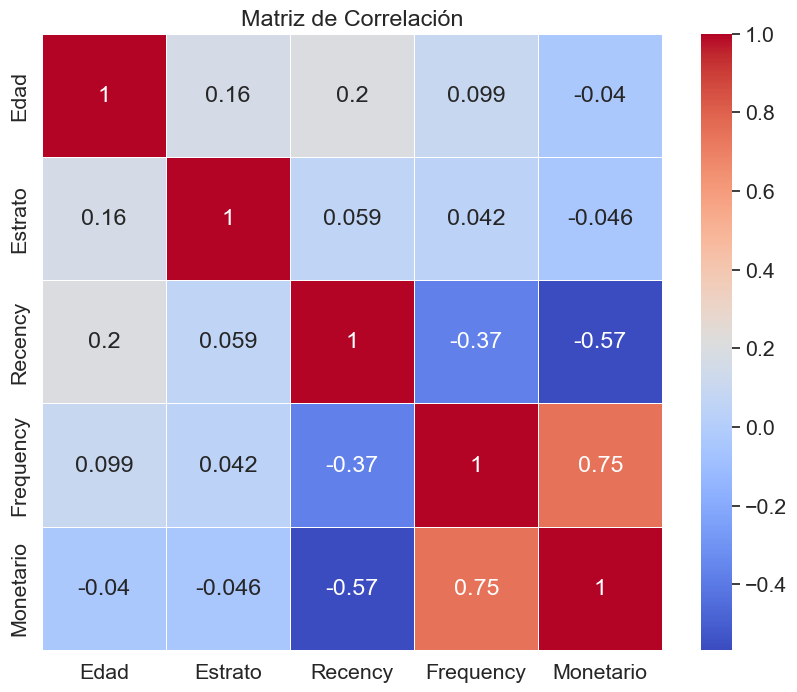

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns="Identificacion")
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Realizamos un análisis a las variables del Dataframe:
**Edad**: Se puede verificar el promedio de los usuarios que compran, teniendo un media de 56 años, podmeos observar datos atípicos como la edad máxima de 124 años.
**Estrato**: La gran mayoría de usuarios se concentra en los estratos 1 y 2.
**Recency**: Tengo una Recencia entre 0 y 103 agrupandose en 20 - 40.
**Frecuency**: Se agrupan entre 1 - 4, teniendo datos atípicos fuera de la media.
**Monetario**: Se agrupan entre 2M - 4M, teniendo datos atípicos fuera de la media.


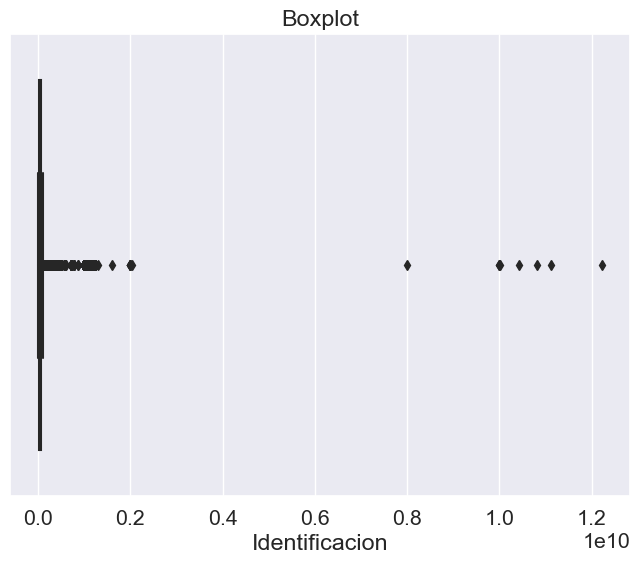

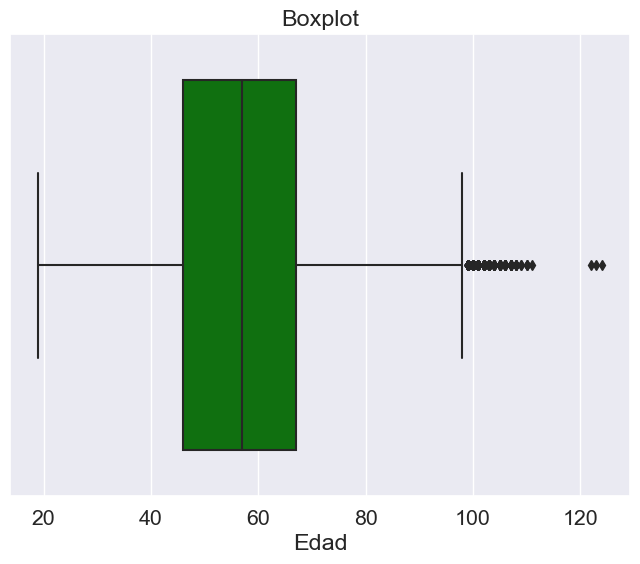

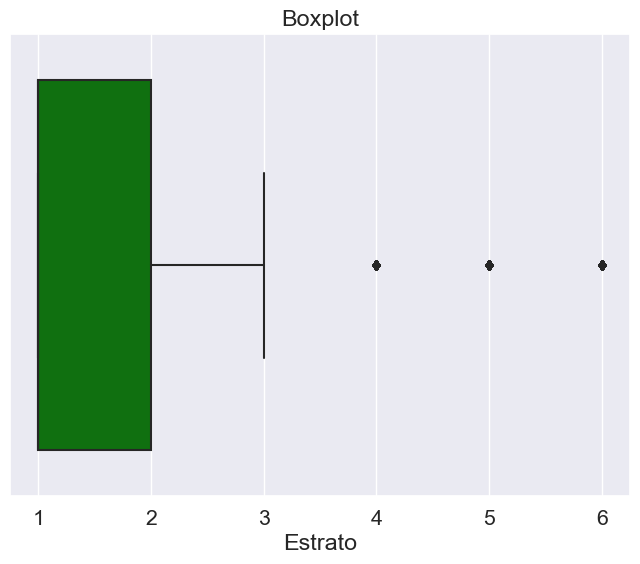

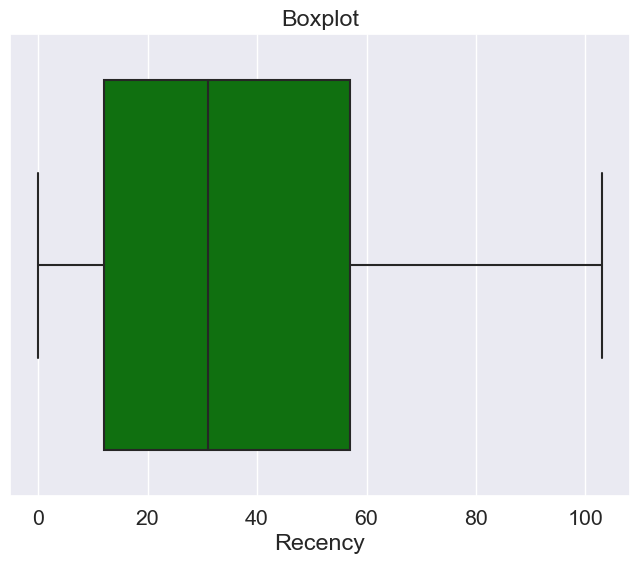

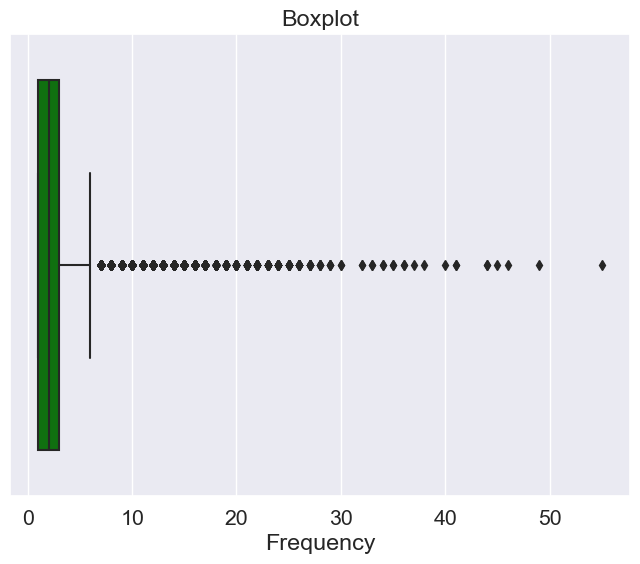

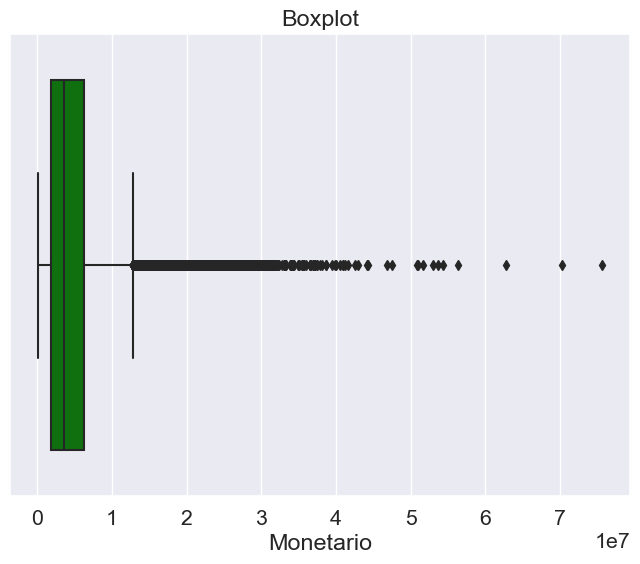

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.set(font_scale=1.4)

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title('Boxplot')  
    plt.show()

Se analiza la distribución de usuarios por Departamento, obteniendo la mayor cantidad de usuarios en Atlántico.

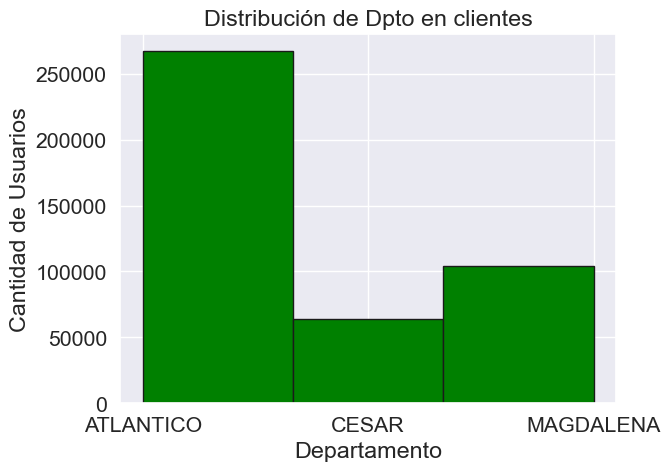

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
dfrecuencia = df['Departamento']

plt.hist(dfrecuencia, bins=3, edgecolor='k',color='green') 

plt.xlabel('Departamento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Dpto en clientes')

plt.show()


La distribución de usuarios por edad, se observa que se concentran en edades adultas entre 40 - 60 años.

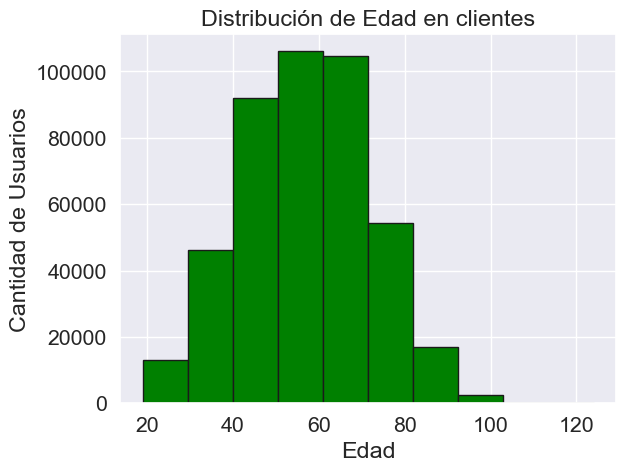

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Edad']

plt.hist(efrecuencia, bins=10, edgecolor='k', color='green') 

plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Edad en clientes')

# Mostrar el gráfico
plt.show()

La distribción por género, se identifica una concentración en el género **Femenino**

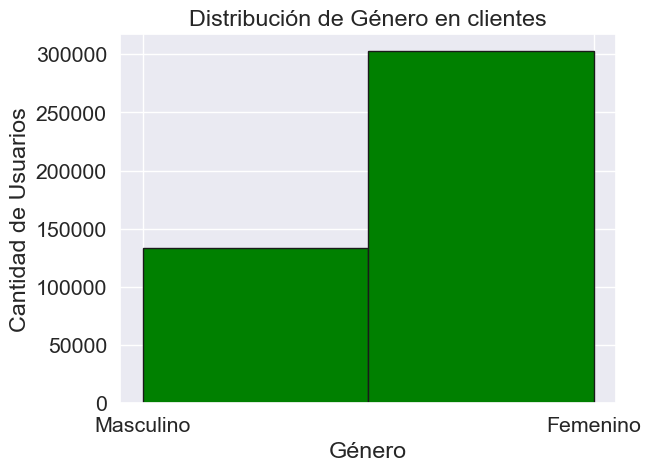

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Genero']

plt.hist(gfrecuencia, bins=2, edgecolor='k', color='green') 

plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Género en clientes')

plt.show()

Como mencionaba anteriormente, por estrato tenemos una concentración en los estratos 1 y 2.

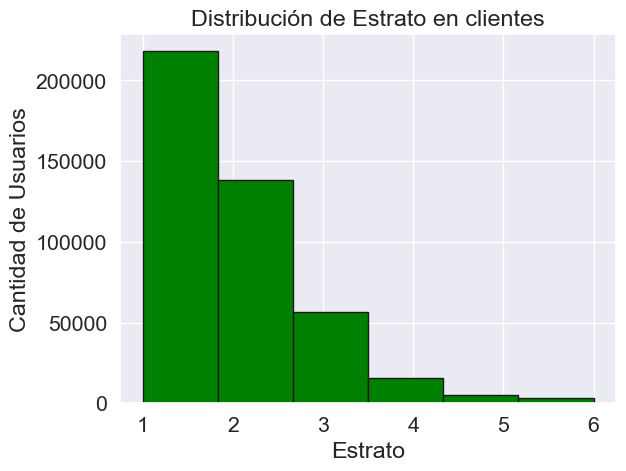

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Estrato']

plt.hist(efrecuencia, bins=6, edgecolor='k', color='green') 

plt.xlabel('Estrato')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Estrato en clientes')

plt.show()

La distribución de usuarios por Recency, tenemos una distibución asimétrica a la izquierda. Se concentra la mayor cantidad de usuarios en Recency entre 0 - 2. Se divide el grupo de datos en dos: Los que tienen menos de 48 meses activos y los que tienen más de 48 meses sin comprar que denominaremos Inactivos.

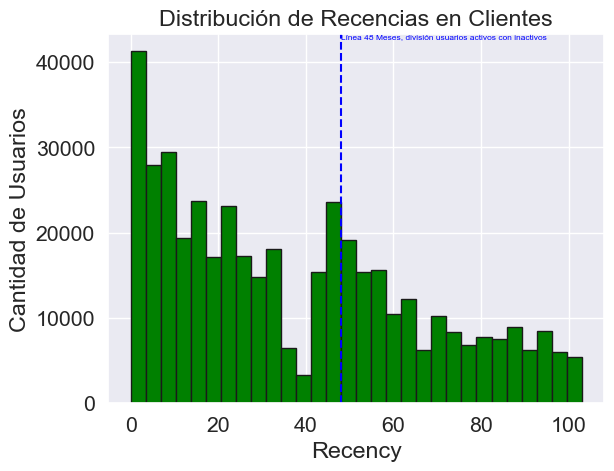

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
rfrecuencia = df['Recency']

plt.hist(rfrecuencia, bins=30, edgecolor='k', color='green')
plt.axvline(x=48, color='blue', linestyle='--', label='Separador: Recency < 48') 

plt.xlabel('Recency')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Recencias en Clientes')
plt.text(48, plt.ylim()[1], 'Línea 48 Meses, división usuarios activos con inactivos', color='blue', fontsize=6, va='top', ha='left')

plt.show()

Distirbución de Clientes por Frequency, tenemos una distribución asimétrica hacia la izquierda. Con datos concentrados entre 2 - 5.

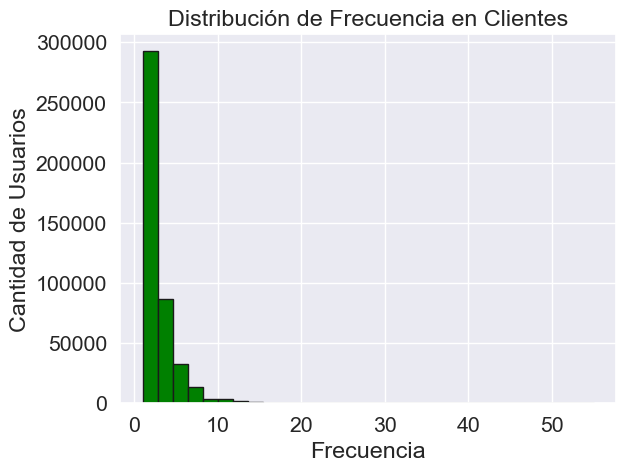

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
ffrecuencia = df['Frequency']

plt.hist(ffrecuencia, bins=30, edgecolor='k', color='green') 

plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Frecuencia en Clientes')

plt.show()

Al igual que el gráfico anterior, tenemos una distribución asimétrica hacia la izquierda.

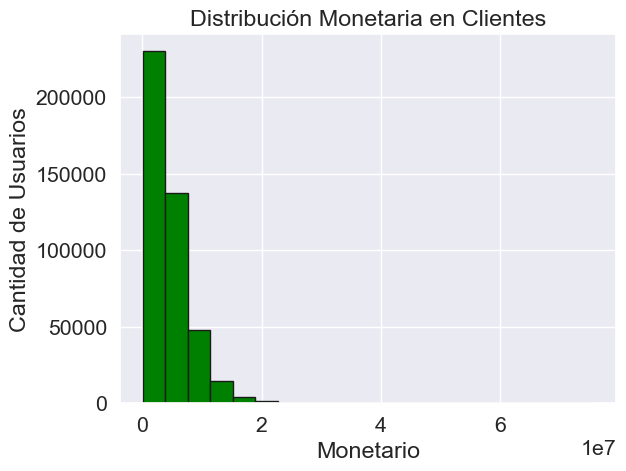

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
mfrecuencia = df['Monetario']

plt.hist(mfrecuencia, bins=20, edgecolor='k', color='green') 

plt.xlabel('Monetario')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución Monetaria en Clientes')

plt.show()

**Análisis Bivariado**
Con el análisis bivariado podemos comprender cómo se relacionan las variables entre sí y la relación entre las variables independientes presentes en el conjunto de datos  y para identificar patrones de tendencia lineal.

Gráfico de dispersión (scatter plot): La parte principal del gráfico es un conjunto de puntos dispersos en un plano cartesiano. Cada punto representa un par de valores de dos variables diferentes que estás comparando.

Línea de regresión: La línea que atraviesa los puntos en el gráfico es la línea de regresión. Esta línea se ajusta a los datos de manera que represente la mejor estimación de la relación entre las dos variables. En un gráfico de dispersión, la línea de regresión se utiliza para modelar una posible tendencia lineal en los datos.

Dirección de la línea de regresión: La dirección de la línea de regresión indica si hay una relación positiva o negativa entre las dos variables. Si la línea sube hacia la derecha, hay una correlación positiva, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar. Si la línea desciende hacia la derecha, hay una correlación negativa, lo que significa que cuando una variable aumenta, la otra tiende a disminuir.

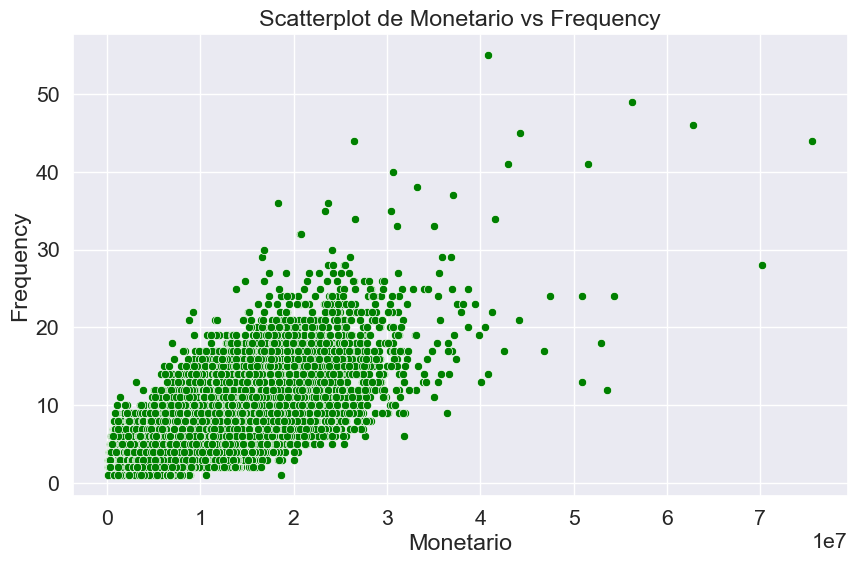

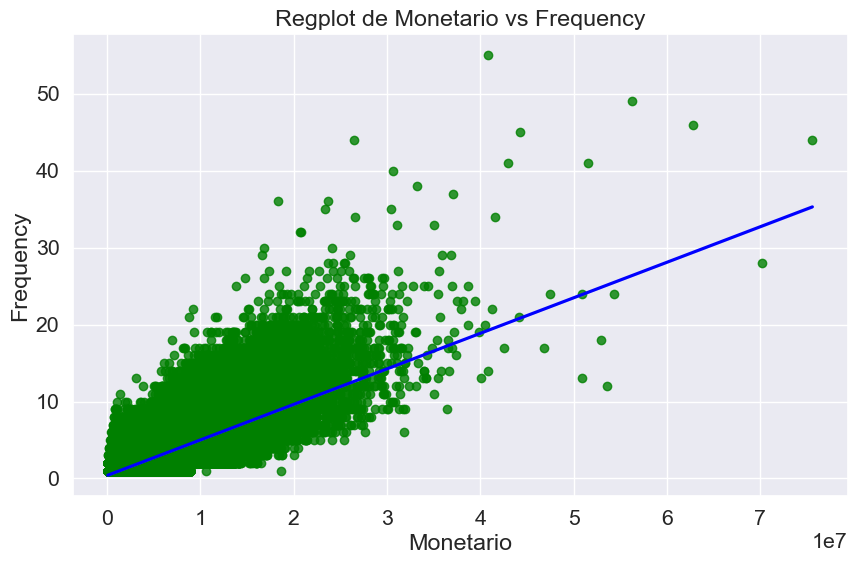

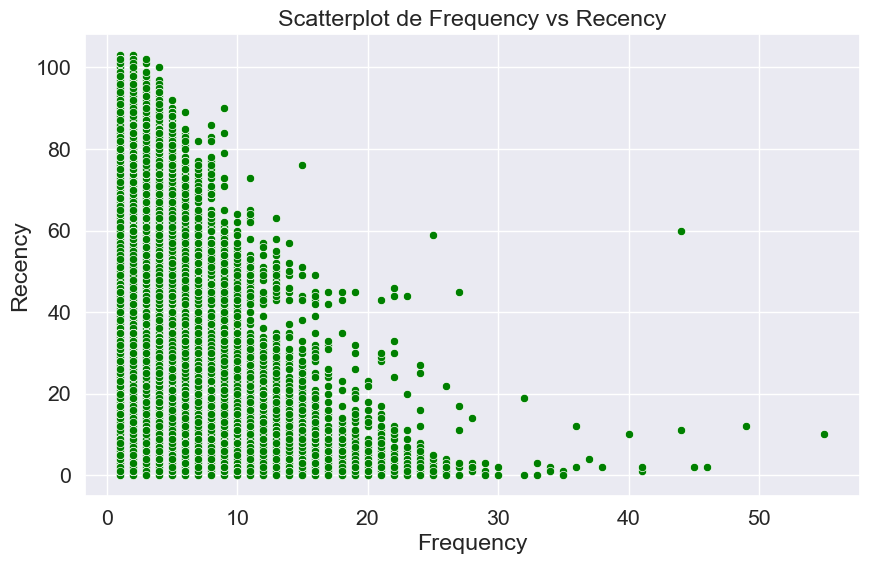

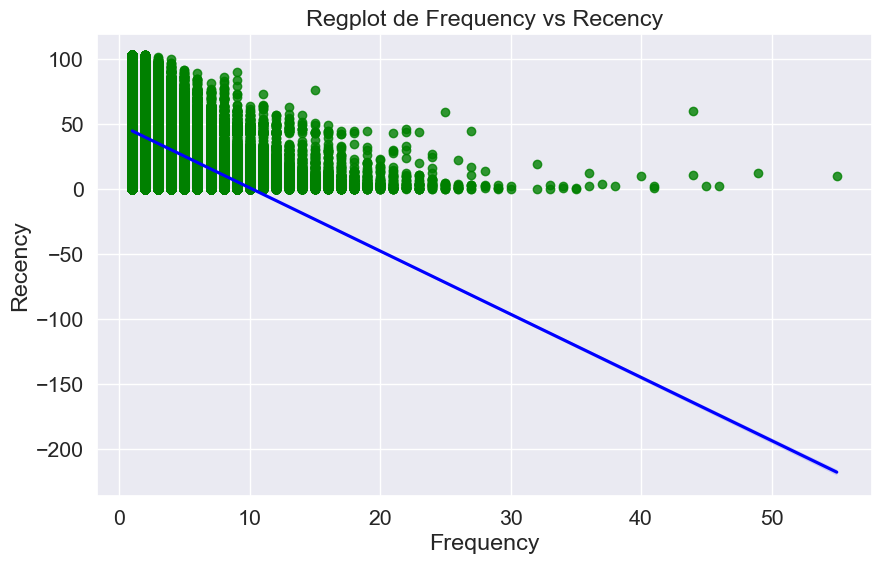

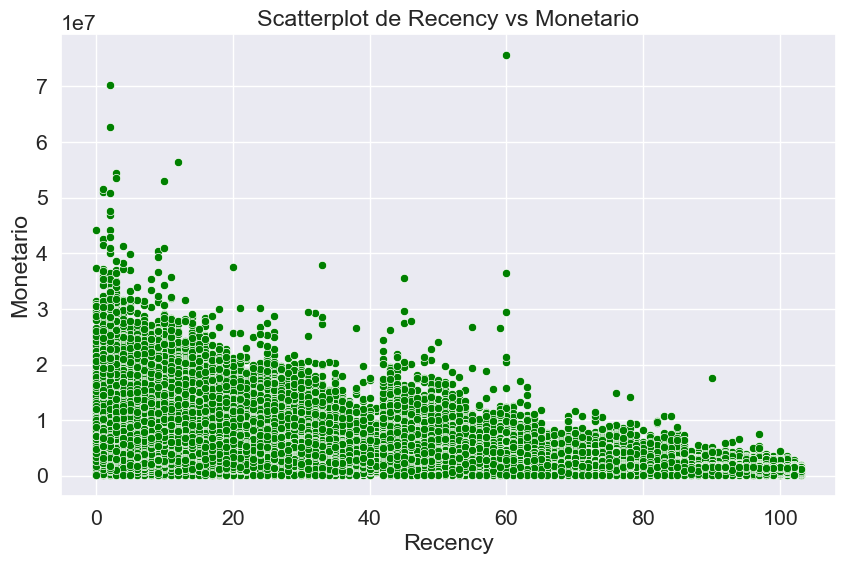

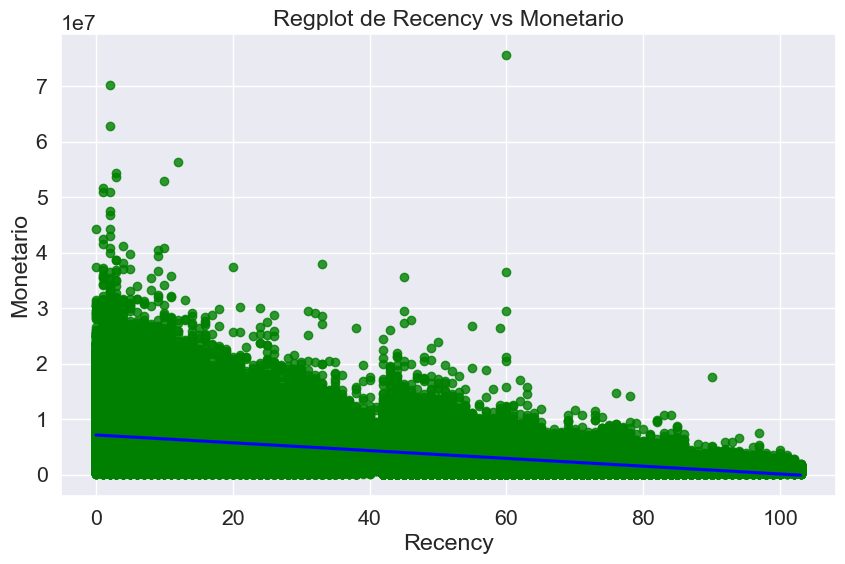

In [31]:
bivar = [('Monetario', 'Frequency'), ('Frequency','Recency'),('Recency','Monetario')]

for pair in bivar:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1], color='green')
    plt.title(f'Scatterplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()
 
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=pair[0], y=pair[1], color= 'green', line_kws={"color":"blue"})
    plt.title(f'Regplot de {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

Dividimos el conjunto de datos en dos partes:
- Usuarios Activos: Aquellos que tienen una Recencia menor o igual a 48 meses.
- Usuarios Inactivos: Aquellos con una Recencia mayor a 48 meses.

Esta distribución es importante porque vamos a analizar la segmentación de los usuarios Activos, ya que los Inactivos son considerados un segmento más y para poder identificarlos no es necesario ejecutar un modelo.

In [57]:
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]

## Escalamiento de Variables

Las variables Frecuencia, y Monetario se escalan en un rango discreto de 1 a 5, 1 siendo el mas bajo, y 5 siendo el mas alto. Esto se hace por medio de segmentación en cuantiles (20%, 40%, 60%, 80%, 100%).

La variable Recencia se escala, similar a Frecuencia y Monetario, en un rango discreto de 1 a 5, 1 siendo el mas reciente, y 5 siendo el menos reciente.

In [58]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_activos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_activos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_activos["Frequency_Scaled"] = df_activos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_activos["Monetario_Scaled"] = df_activos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_activos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_activos["Recency_Scaled"] = df_activos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))    

Realizamos el mismo ejercicio para los usuarios Inactivos:

In [59]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_inactivos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_inactivos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_inactivos["Frequency_Scaled"] = df_inactivos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_inactivos["Monetario_Scaled"] = df_inactivos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_inactivos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_inactivos["Recency_Scaled"] = df_inactivos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))   

# Evaluación de Modelos

## K-MEANS - Modelo No Supervisado

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. Sin embargo, se utilizarán técnicas de clasificación supervisada como regresión logística, máquinas de soporte vectorial (SVM), árboles de decisión, entre otros.
![imagen.jpg](./Imagenes/6.jpeg)

Con los datos escalados, se procede a crear y entrenar el Modelo K-means para el conjunto de datos de **Usuarios Activos**. Se crea un objeto, en el cual se define el número de Clusters a crear (4).

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Seleccionamos las columnas
X = df_activos[['Frequency_Scaled', 'Monetario_Scaled', 'Recency_Scaled']]

# Se crea un objeto K-Means con el número de clusters
kmeans = KMeans(n_clusters=4)

# Se entrena el modelo K-Means
kmeans.fit(X)

# Se asinga un cluster a cada punto de datos
labels = kmeans.labels_

# Agregamos las etiquetas de cluster al DataFrame original
df_activos['Cluster'] = labels

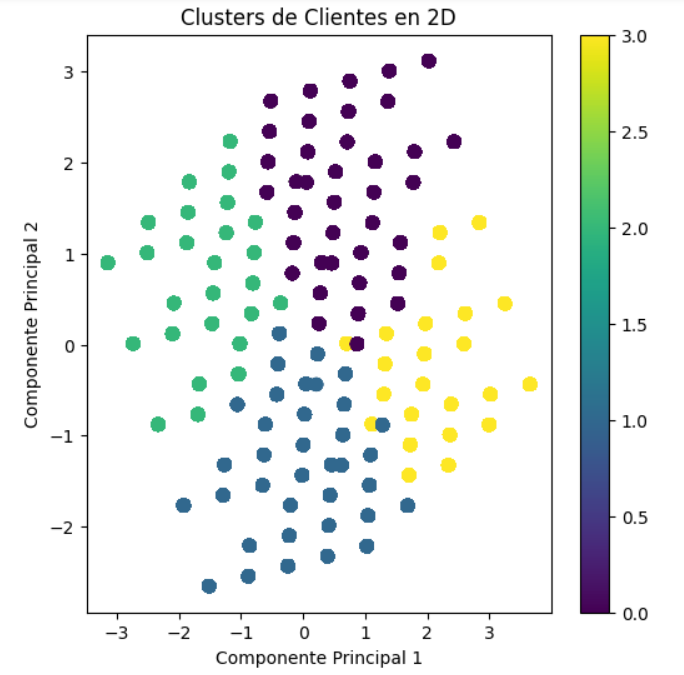

A continuación procedemos con la visualización de los Clusters creados por el modelo. Se crea un gráfico en 3D donde se pueden evidenciar claramente cada uno de los clusters creados. Tenemos 4 para este ejercicio, identificados con color azul, amarillo, morado y verde.

In [ ]:
# Visualizar los resultados del clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_activos['Frequency_Scaled'], df_activos['Monetario_Scaled'], df_activos['Recency_Scaled'], c=labels, cmap='viridis', s=5)
ax.set_xlabel('Recency_Scaled')
ax.set_ylabel('Monetario_Scaled')
ax.set_zlabel('Frequency_Scaled')
ax.set_title('Resultados del Clustering con K-Means')
plt.show()

![imagen.jpg](./Imagenes/7.jpeg)

In [61]:
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,2
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,0
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,0
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,0
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,0


Como se mencionó al inicio, el modelo K-Means es ideal para agrupar los datos en clusters pero no asigna etiquetas. En este caso, procederemos a asignar manualmente una categoría a cada uno de los segmentos con el fin de evaluar más adelante modelos supervisados que nos puedan entregar las etiquetas y así poder comparar.

In [62]:
# Se asignan las etiquetas de clasificación
def asignaretiqueta(cluster):
    if cluster == 0:
        return "Nuevo"
    elif cluster == 1:
        return "Bronce"
    elif cluster == 2:
        return "Plata"
    elif cluster == 3:
        return "Diamante"

df_activos['Segmento'] = df_activos['Cluster'].apply(asignaretiqueta)
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,2,Plata
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,0,Nuevo
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,0,Nuevo
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,0,Nuevo
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,0,Nuevo


El conjunto de Datos de Usuarios Inactivos no se procesa bajo el modelo de K-Means porque este grupo de usuarios ya es considerado un Cluster. Se Prodece a modificar el dataframe, agregando manualmente las columnas Cluster y Segmento con el fin de poder unificar este dataframe con el de usuarios Activos.

In [63]:
df_inactivos['Cluster'] = '4'
df_inactivos['Segmento'] = 'Inactivo'
df_inactivos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
0,20888.0,ATLANTICO,BARRANQUILLA,9/03/1928,97,Masculino,6,70,2,204000,4,1,3,4,Inactivo
1,25220.0,ATLANTICO,BARRANQUILLA,23/04/1953,72,Masculino,5,92,1,1443498,1,2,5,4,Inactivo
2,31903.0,CESAR,VALLEDUPAR,18/05/1927,98,Femenino,6,97,1,1555569,1,2,5,4,Inactivo
3,35796.0,ATLANTICO,BARRANQUILLA,9/02/1928,97,Masculino,6,82,2,251999,4,1,4,4,Inactivo
5,37332.0,ATLANTICO,BARRANQUILLA,29/06/1936,89,Masculino,4,79,1,122000,1,1,4,4,Inactivo


Unificamos ambos dataframes para otener un solo conjunto de datos. Y validar todos los segmentos obtenidos.

In [64]:
df = pd.concat([df_activos, df_inactivos], axis=0, ignore_index=True)

Obtenemos la siguiente distribución de usuarios por segmento, donde se evidencia que los Usuarios inativos tienen una distribución mucho mayor. Esto es clave para que el área de mercadeo implemente estrategias que incentiven a los usuarios a hacer compras. Los usuarios Diamante y  distribución muy similar con aproximado 55mil usuarios y los usurios Nuevos y Plata también se comportan muy parecido con un aproximado de 87mil usuarios.

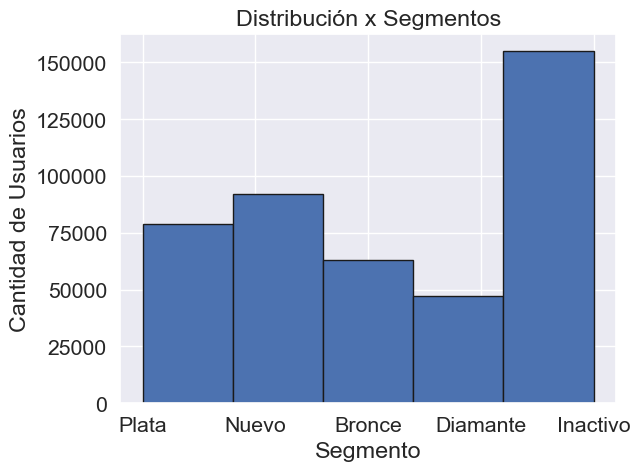

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Segmento']

plt.hist(gfrecuencia, bins=5, edgecolor='k') 

plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución x Segmentos')

plt.show()

Finalmente, obtenemos un resumen de los datos por segmento. Estos datos proporcionan información sobre diferentes segmentos de usuarios, incluyendo el número de usuarios, cuán recientes son sus interacciones, con qué frecuencia interactúan y cuál es su valor monetario promedio. Estos detalles son valiosos para la segmentación de clientes y la toma de decisiones comerciales.

In [51]:
import pandas as pd

Tabla = df.groupby('Segmento').agg({
    'Identificacion': 'nunique',  # Recuento distinto de usuarios
    'Recency': 'mean',            # Promedio de Recency
    'Frequency': 'mean',          # Promedio de Frequency
    'Monetario': 'mean'           # Promedio de Monetario
}).reset_index()

Tabla.columns = ['Segmento', 'Usuarios', 'Recencia', 'Frecuencia', 'Monetario']
Tabla = Tabla.round(0)
print(Tabla)

   Segmento  Usuarios  Recencia  Frecuencia   Monetario
0    Bronce     91996      33.0         2.0   2958487.0
1  Diamante     78768       8.0         2.0   4866385.0
2  Inactivo    154978      70.0         2.0   2275067.0
3     Nuevo     47041      29.0         4.0   6954262.0
4     Plata     63134       7.0         6.0  10132433.0


### Análisis VIF

El VIF ayuda a identificar qué variables están contribuyendo significativamente a la multicolinealidad y, por lo tanto, pueden ser candidatas para su eliminación o combinación con otras variables.

In [66]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = df.drop(columns=['Departamento','Localidad','Genero','Fecha_Nacimiento','Segmento'])

In [67]:
num_columns = df.select_dtypes(include=[np.number])
vif1 = pd.DataFrame()
vif1["Variable"] = num_columns.columns
vif1["VIF"] = [variance_inflation_factor(num_columns.values, i) for i in range(num_columns.shape[1])]

Se identifican las variables con un VIF mayor a 5, y se procede con la eliminación del modelo.

In [68]:
VIF5 = vif1[vif1["VIF"] >= 5]
print(VIF5)

           Variable        VIF
1              Edad  13.002166
3           Recency   7.281547
4         Frequency  11.371990
5         Monetario  18.519116
6  Frequency_Scaled  12.123536
7  Monetario_Scaled  21.438869
8    Recency_Scaled   8.060663


In [69]:
df = df.drop(columns=['Edad','Recency','Frequency','Monetario'])

In [70]:
df['Cluster'] = pd.to_numeric(df['Cluster'], errors='coerce', downcast='integer')

El modelo se aplicará solo a los usuarios Activos, porlo que eliminamos del data frame a todos los ususarios con etiqueta "inactivo" o Cluster 4

In [71]:
df = df[df['Cluster'] != 4]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280939 entries, 0 to 280938
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Identificacion    280939 non-null  float64
 1   Estrato           280939 non-null  int64  
 2   Frequency_Scaled  280939 non-null  int64  
 3   Monetario_Scaled  280939 non-null  int64  
 4   Recency_Scaled    280939 non-null  int64  
 5   Cluster           280939 non-null  int8   
dtypes: float64(1), int64(4), int8(1)
memory usage: 13.1 MB


## Modelos De Clasificación Supervisados

**K-NN (K-Nearest Neighbors):** Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.


![imagen.png](./imagenes/2.jpeg)

**Decision Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

![imagen.png](./imagenes/1.jpeg)

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

![imagen.png](./imagenes/4.jpeg)

**XGBoost (Extreme Gradient Boosting):** Un algoritmo de aumento de gradientes extremos que se utiliza para tareas de segmentación y predicción. Es conocido por su alta eficacia y capacidad de manejar grandes conjuntos de datos.

![imagen.png](./imagenes/3.jpeg)

**AdaBoost Classifier (AdaBoost con Clasificación):** Es un algoritmo de ensamblado que se utiliza principalmente para problemas de clasificación. Se basa en la idea de mejorar el rendimiento de modelos más simples al darles más peso a los ejemplos clasificados incorrectamente en cada iteración. AdaBoost entrena una secuencia de modelos de clasificación débiles (por lo general, árboles de decisión débiles) y los combina para formar un clasificador fuerte.

![imagen.png](./imagenes/5.jpeg)

Dividimos el conjunto de datos en dos partes:
1. Evaluaremos los datos de Training y test con los primeros 200.000 registros de nuestro Dataframe.
2. Los 82.000 registros restantes se utilizarán para evaluación de modelo.

In [73]:
from sklearn.model_selection import train_test_split
n = 200000
df_subset = df.iloc[:n]

In [74]:
X = df_subset.drop('Cluster', axis=1)
y = df_subset['Cluster']

# Separamos el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Definimos los modelos a evaluar:

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
adaboost_classifier_model = AdaBoostClassifier()

Utilizamos la libreria de pipelines que facilita la experimentación y garantiza resultados reproducibles y coherentes. Cada pipeline encapsula el flujo de trabajo específico de un modelo, lo que facilita la gestión y la iteración en el desarrollo de modelos.

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Se crean pipelines para cada modelo
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', knn_model)
])

tree_pipeline = Pipeline([
    ('tree', tree_model)
])

rf_pipeline = Pipeline([
    ('rf', rf_model)
])

xgb_pipeline = Pipeline([
    ('xgb', xgb_model)
])
adaboost_classifier_pipeline = Pipeline([
    ('adaboost_classifier', adaboost_classifier_model)
])

 La selección adecuada de los hiperparámetros es crucial para obtener un rendimiento óptimo de los modelos. Esto implica comprender cómo afectan los hiperparámetros al comportamiento del modelo, realizar búsquedas sistemáticas para encontrar los valores óptimos y adaptar los hiperparámetros a las características específicas del problema.

In [87]:
from sklearn.model_selection import GridSearchCV

# Se definen los hiperparámetros a buscar para cada modelo
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

param_grid_tree = {
    'tree__max_depth': [3, 5, 7],
    'tree__min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [None, 5, 10]
}

param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_adaboots = {
    'adaboots__n_estimators': [50, 100, 200],
    'adaboots__max_depth': [3, 5, 7],
    'adaboots__learning_rate': [0.01, 0.1, 0.2]
}
param_grid_adaboost_classifier = {
    'adaboost_classifier__n_estimators': [100,150, 200],
    'adaboost_classifier__learning_rate': [0.01, 0.1, 0.2]
}

La búsqueda de hiperparámetros y la validación cruzada son prácticas críticas para desarrollar modelos de aprendizaje automático efectivos y robustos. Ayudan a mejorar el rendimiento, evitar el sobreajuste, optimizar recursos y tomar decisiones basadas en datos al evaluar y seleccionar modelos. 

In [88]:
# Se realiza la búsqueda de hiperparámetros y validación cruzada para cada modelo
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_adaboost_classifier = GridSearchCV(adaboost_classifier_pipeline, param_grid_adaboost_classifier, cv=5, scoring='roc_auc')

In [89]:
# Se Ajustan los modelos a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_adaboost_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('adaboost_classifier',
                                        AdaBoostClassifier())]),
             param_grid={'adaboost_classifier__learning_rate': [0.01, 0.1, 0.2],
                         'adaboost_classifier__n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Función para calcular y registrar las métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')
    return precision, recall, f1, auc

# Evaluar cada modelo
knn_metrics = evaluate_model(grid_search_knn, X_test, y_test)
tree_metrics = evaluate_model(grid_search_tree, X_test, y_test)
rf_metrics = evaluate_model(grid_search_rf, X_test, y_test)
xgb_metrics = evaluate_model(grid_search_xgb, X_test, y_test)
adaboost_classifier_metrics = evaluate_model(grid_search_adaboost_classifier, X_test, y_test)

In [91]:
#Registrar resultados
results_df = pd.DataFrame({
    'Modelo': ['K-NN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost Classifier'],
    'Precisión': [knn_metrics[0], tree_metrics[0], rf_metrics[0], xgb_metrics[0], adaboost_classifier_metrics[0]],
    'Recall': [knn_metrics[1], tree_metrics[1], rf_metrics[1], xgb_metrics[1], adaboost_classifier_metrics[1]],
    'F1_Score': [knn_metrics[2], tree_metrics[2], rf_metrics[2], xgb_metrics[2], adaboost_classifier_metrics[2]],
    'AUC': [knn_metrics[3], tree_metrics[3], rf_metrics[3], xgb_metrics[3], adaboost_classifier_metrics[3]]
})

print(results_df)

                Modelo  Precisión    Recall  F1_Score       AUC
0                 K-NN   0.999250  0.999250  0.999250  0.999862
1        Decision Tree   0.881092  0.867900  0.866346  0.979224
2        Random Forest   1.000000  1.000000  1.000000  1.000000
3              XGBoost   0.955447  0.954083  0.952559  0.996114
4  AdaBoost Classifier   0.896991  0.840417  0.850850  0.992349


Graficamos los resultados obtenidos para cada modelo:

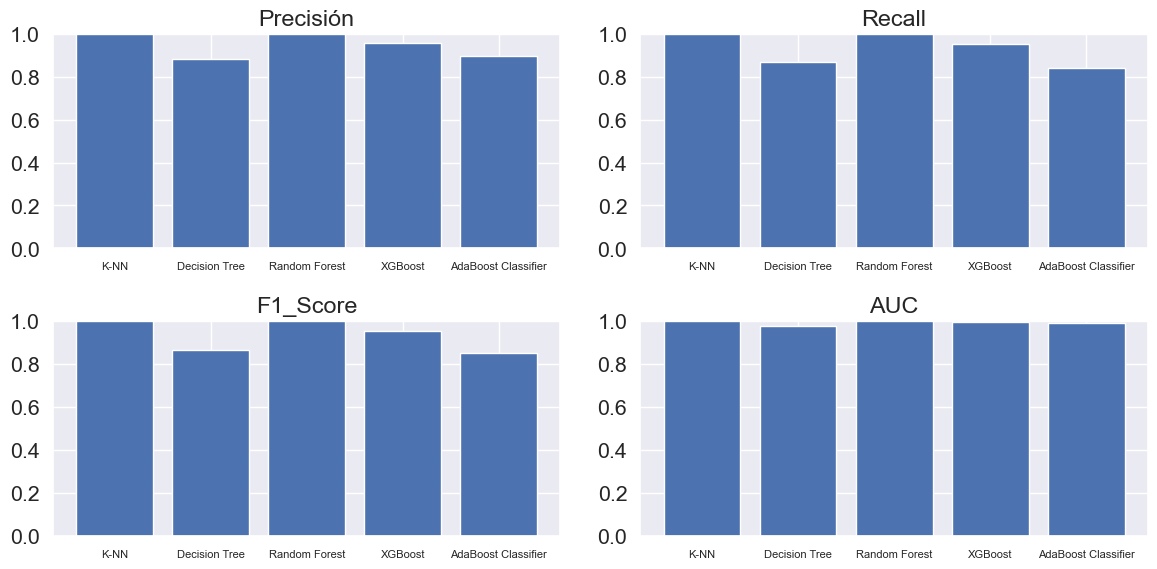

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar las métricas de precisión, recall, F1_Score y AUC
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(2, 2, 1)
plt.bar(results_df['Modelo'], results_df['Precisión'])
plt.title('Precisión')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Recall
plt.subplot(2, 2, 2)
plt.bar(results_df['Modelo'], results_df['Recall'])
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Puntuación F1
plt.subplot(2, 2, 3)
plt.bar(results_df['Modelo'], results_df['F1_Score'])
plt.title('F1_Score')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# AUC
plt.subplot(2, 2, 4)
plt.bar(results_df['Modelo'], results_df['AUC'])
plt.title('AUC')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Como se puede observar K-NN y Random Forest optubieron los mejores puntajes, esto se debe a que son modelos muy ponetentes de clasifiacion, Ademas se ve una gran rendimiento general de cada modelo, lo que puede significar dos cosas, o los modelos estan sobre ajustados, es decir, que aprendieron los datos de mamemoria y cuando se enfrenten a nuevos datos los modelos no tedran un buen rendimiento, o los datos no soy muy complejos por lo que los modelos pueden hallar facilmente una solucion. 

Para evitar eso se realizaron validaciones, que es justamente evaluar el modelo con datos nuevos.

Se escoge el mejor modelo, según el AUC:

In [98]:
# Encuentra el mejor modelo según AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax()]['Modelo']
best_model = None

# Encuentra el modelo correspondiente al mejor modelo
if best_model_name == 'K-NN':
    best_model = grid_search_knn.best_estimator_
elif best_model_name == 'Decision Tree':
    best_model = grid_search_tree.best_estimator_
elif best_model_name == 'Random Forest':
    best_model = grid_search_rf.best_estimator_
elif best_model_name == 'XGBoost':
    best_model = grid_search_xgb.best_estimator_
elif best_model_name == 'AdaBoost Classifier':
    best_model = grid_search_adaboost_classifier.best_estimator_
    
best_DecisionTree = grid_search_tree.best_estimator_
best_Knn = grid_search_knn.best_estimator_
best_RandomForest = grid_search_rf.best_estimator_
best_XGBoost = grid_search_xgb.best_estimator_
best_AdaBoost= grid_search_adaboost_classifier.best_estimator_

In [99]:
print(best_model)

Pipeline(steps=[('rf', RandomForestClassifier())])


Como se menciono antes Random Forest (rf) es modelo con mayor puntaje AUC y se selecciono con este codigo previo a la validacion para confirmar si este resultado cambia.

## Resultados Obtenidos

Realizamos validaciones adicionales con un conjunto de datos nuevos, que corresponde a la 2da parte del conjunto de datos que habíamos mencionado al inicio. Se realiza análisis de la curva ROC y la matriz de Confusión para cada uno de los modelos evaluados.

In [100]:
test_df = df.tail(80939)

X_new = test_df.drop('Cluster', axis=1)
y_new = test_df['Cluster']

Seleccionamos a quellos datos del data frame original que no se ahbian utilizado y definimso nuestro X_new, como estas variables descriptibas y Y_new como las etiquetas de deben predecir.

In [110]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc
import matplotlib.pyplot as plt
import itertools

In [113]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_models = [best_DecisionTree, best_Knn, best_RandomForest, best_XGBoost, best_AdaBoost]
Modelo = ['Decision Tree','K-NN','Random Forest','XGBoost','AdaBoost Classifier']

results = []


for i, model in enumerate(best_models):
    # Inicializar métricas como None
    precision_new = None
    recall_new = None
    f1_new = None
    auc_new = None
    
    try:
        # Aplicar el modelo al nuevo conjunto de datos
        y_pred_new = model.predict(X_new)

        # Calcular las métricas de precisión
        precision_new = precision_score(y_new, y_pred_new, average='weighted')
        recall_new = recall_score(y_new, y_pred_new, average='weighted')
        f1_new = f1_score(y_new, y_pred_new, average='weighted')

        # Calcular el AUC
        if hasattr(model, 'predict_proba'):
            auc_new = roc_auc_score(y_new, model.predict_proba(X_new), average='weighted', multi_class='ovr')
    except Exception as e:
        print(f"Error al calcular métricas para {Modelo[i]}: {str(e)}")

    # Agrega las métricas al resultado
    results.append({
        'Modelo': Modelo[i],
        'Precisión': precision_new,
        'Recall': recall_new,
        'F1-Score': f1_new,
        'AUC': auc_new
    })

all_metrics_df = pd.DataFrame(results)

# Resultados
print(all_metrics_df)


                Modelo  Precisión    Recall  F1-Score       AUC
0        Decision Tree   0.897056  0.883245  0.882772  0.985135
1                 K-NN   0.993482  0.993440  0.993449  0.999134
2        Random Forest   1.000000  1.000000  1.000000  1.000000
3              XGBoost   0.971835  0.971028  0.969624  0.998285
4  AdaBoost Classifier   0.920851  0.835815  0.857960  0.995496


Obtenemos los resultados de los modelos entrenados con los primeros datos y ahora validados con los nuevos datos. Vemos como los puntajes bajaron un poco en comparacion a los anteriores pero nada que resulte significante, por lo que es poco probable que los modelos esten sobre ajustados y mucho más logico que las variables no soy muy complejas, por lo que los modelos logran predecir con exito la gran parte de las etiquetas.

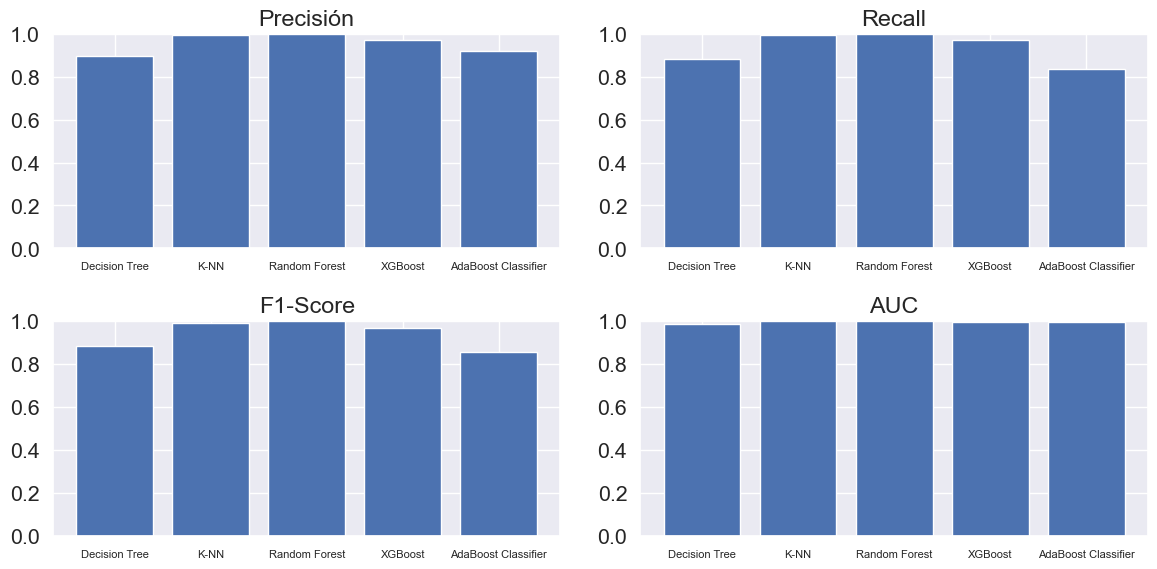

In [115]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar las métricas de precisión, recall, F1_Score y AUC
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(2, 2, 1)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['Precisión'])
plt.title('Precisión')
plt.ylim(0, 1)
plt.xticks(fontsize=8)


# Recall
plt.subplot(2, 2, 2)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['Recall'])
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Puntuación F1
plt.subplot(2, 2, 3)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['F1-Score'])
plt.title('F1-Score')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# AUC
plt.subplot(2, 2, 4)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['AUC'])
plt.title('AUC')
plt.ylim(0, 1)
plt.xticks(fontsize=8)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Graficamos los resultados de los modelos validados con los nuevos datos.

In [ ]:
best_models = [best_DecisionTree, best_Knn, best_RandomForest, best_XGBoost, best_AdaBoost]
Modelo = ['Decision Tree', 'K-NN', 'Random Forest', 'XGBoost', 'AdaBoost Classifier']

results = []

for i, model in enumerate(best_models):
 
    precision_new = None
    recall_new = None
    f1_new = None
    auc_new = None
    confusion = None

    try:
        # Se aplica el modelo al nuevo conjunto de datos
        y_pred_new = model.predict(X_new)

        # Se calculan las métricas de precisión
        precision_new = precision_score(y_new, y_pred_new, average='weighted')
        recall_new = recall_score(y_new, y_pred_new, average='weighted')
        f1_new = f1_score(y_new, y_pred_new, average='weighted')

        # Se calcula el AUC
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_new)
            auc_new = roc_auc_score(y_new, y_pred_prob, average='weighted', multi_class='ovr')
            
            # Matriz de confusión
            confusion = confusion_matrix(y_new, y_pred_new)
            
            # Grafico de la matriz de confusión
            plt.figure()
            plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title(f'Matriz de Confusión para {Modelo[i]}')
            plt.colorbar()
            classes = np.unique(y_new)
            tick_marks = np.arange(len(classes))
            plt.xticks(tick_marks, classes)
            plt.yticks(tick_marks, classes)
            
            fmt = 'd'
            thresh = confusion.max() / 2.
            for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
                plt.text(j, i, format(confusion[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if confusion[i, j] > thresh else "black")
            
            plt.ylabel('Etiqueta Verdadera')
            plt.xlabel('Etiqueta Predicha')
            plt.tight_layout()
            plt.show()
            
            
             # Curva ROC x Clase
            n_classes = len(np.unique(y_new))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for class_idx in range(n_classes):
                fpr[class_idx], tpr[class_idx], _ = roc_curve(y_new == class_idx, y_pred_prob[:, class_idx])
                roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])
            
            # Graficar la curva ROC para cada clase
            plt.figure()
            lw = 2
            for class_idx in range(n_classes):
                plt.plot(fpr[class_idx], tpr[class_idx], lw=lw,
                         label=f'ROC curve (class {class_idx}) (AUC = {roc_auc[class_idx]:0.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.title(f'Curva ROC para {Modelo[i]}')
            plt.legend(loc="lower right")
            plt.show()            
            
    except Exception as e:
        print(f"Error al calcular métricas para {Modelo[i]}: {str(e)}")
            # Agrega las métricas al resultado
    results.append({
        'Modelo': Modelo[i],
        'Precisión': precision_new,
        'Recall': recall_new,
        'F1-Score': f1_new,
        'AUC': auc_new,
        'Matriz de Confusión': confusion
    })

En el codigo de ariba de definen y calculan todas la graficas que se mostratan a continuacion.

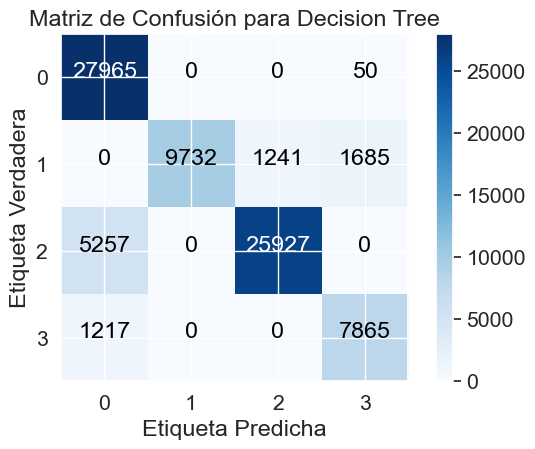

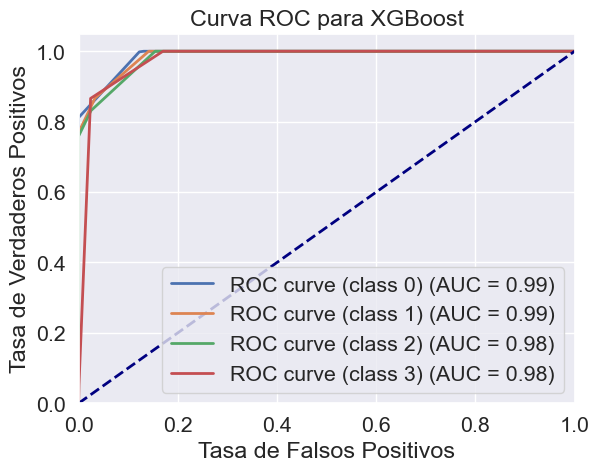

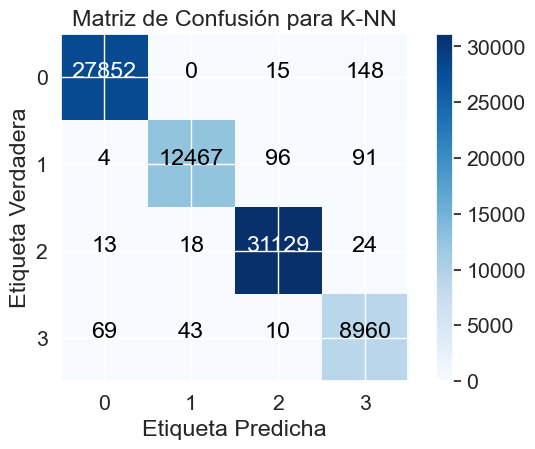

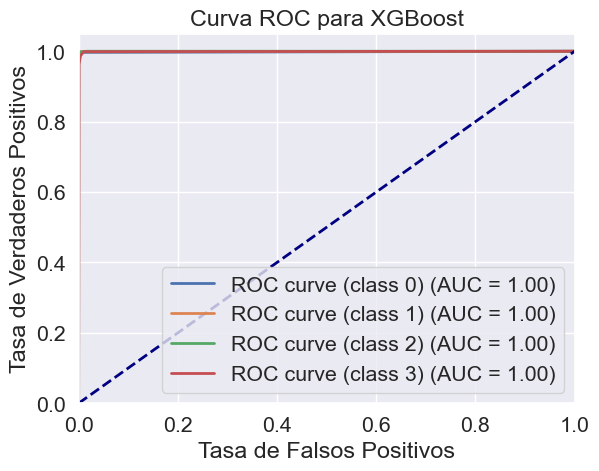

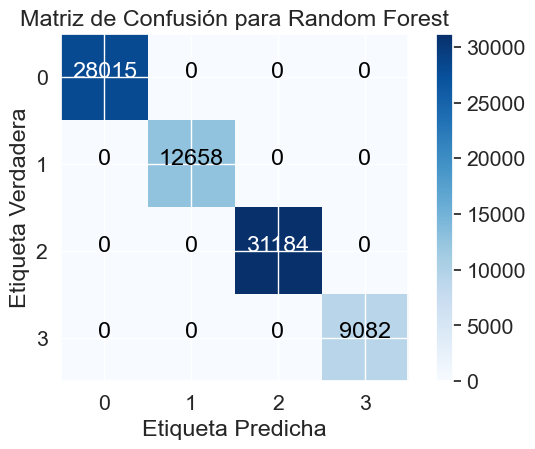

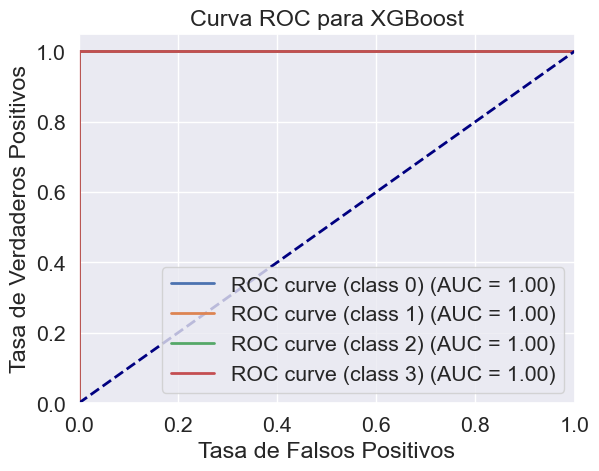

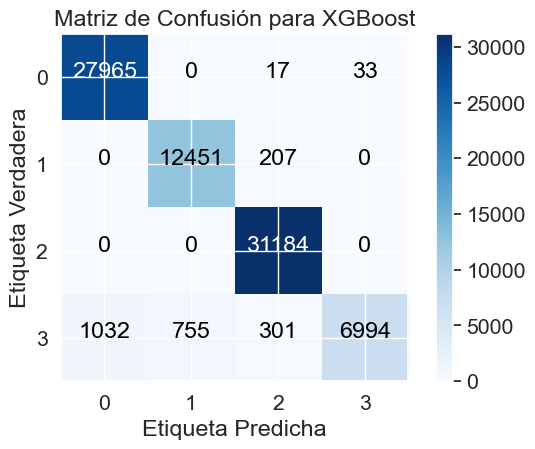

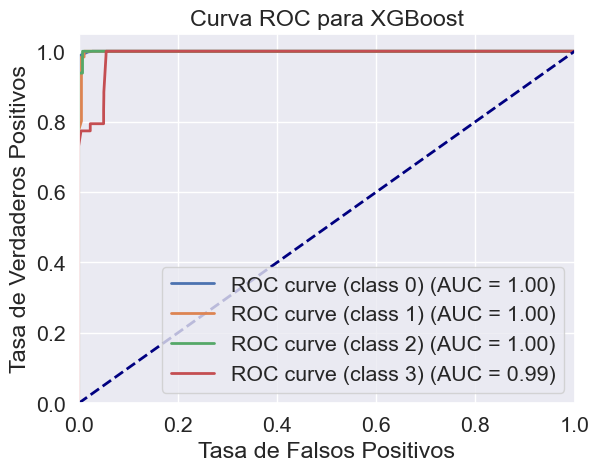

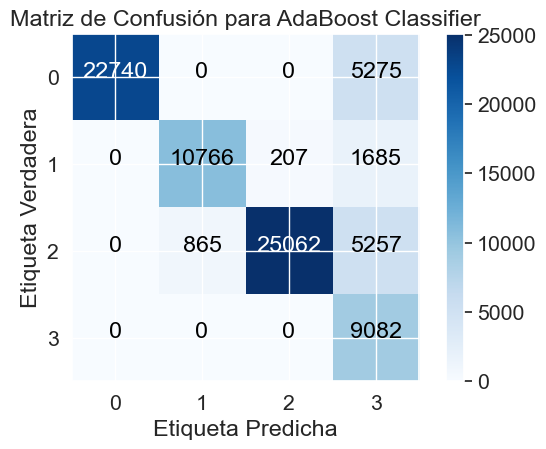

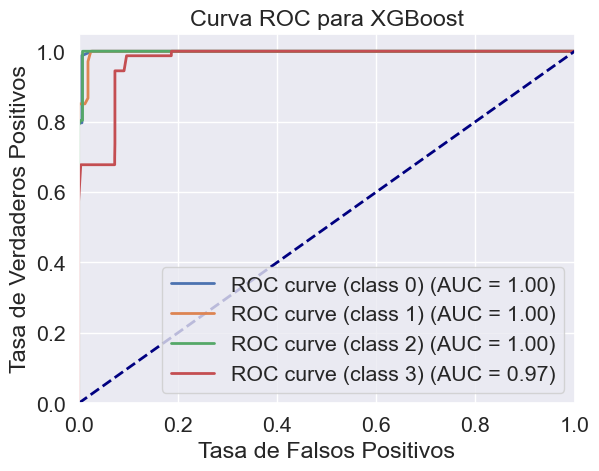

    Modelo  Precisión    Recall  F1-Score       AUC  \
0  XGBoost   0.897056  0.883245  0.882772  0.985135   
1  XGBoost   0.993482  0.993440  0.993449  0.999134   
2  XGBoost   1.000000  1.000000  1.000000  1.000000   
3  XGBoost   0.971835  0.971028  0.969624  0.998285   
4  XGBoost   0.920851  0.835815  0.857960  0.995496   

                                 Matriz de Confusión  
0  [[27965, 0, 0, 50], [0, 9732, 1241, 1685], [52...  
1  [[27852, 0, 15, 148], [4, 12467, 96, 91], [13,...  
2  [[28015, 0, 0, 0], [0, 12658, 0, 0], [0, 0, 31...  
3  [[27965, 0, 17, 33], [0, 12451, 207, 0], [0, 0...  
4  [[22740, 0, 0, 5275], [0, 10766, 207, 1685], [...  


In [108]:

all_metrics_df = pd.DataFrame(results)
# Resultados
print(all_metrics_df)

# Resultados
Describiremos un poco el rendimiento general de los modelos para esto utilizamos las grafica de Matriz de confución la cual tiene en el eje verticar las etiquetas reales del cliente y en el eje horizontal las etiquetas predichas por el modelo. Y para la Curva ROC se tiene en el eje verticar la tasa de verdaderos positivos (por ejemplo cuando un modelo predice que la etiquera es 1 y la etqueta real concuerda) y en el eje horizontal la taza de falsos positivos (por ejemplo cuando un modelo predice que la etiquera es 1 y la etqueta real es diferente), tambien esta una lien azul punteada que muestra el redimiento de un modelo si este funcinara como una moneda, es decir, un modeo que solo acertara el 50% de las veces 


## Matriz de confucion Modelo Tree 

Estamos viendo las etiquetas reales contra las etiquetas predichas y podemos notar como en la primeta fila el modelo clasifica 28015 clientes (27960 + 50) con la etiqueta 0 pero para 27960 si que les corrspondia esa etiqueta y a los 50 otros les corrspondia la etiqueta 3, siguiendo esta logica para el resto de filas podemos ver que el modelo etiqueta correcta mente a la gran mayoria de clientes, pero aun asi comete muchos fallos al etiquetar 1, 2, y 3, aqui se puede evidenciar algo de sobre ajuste 

![MTree.png](./imagenes/MTree.png)

## Matriz de confucion Modelo K-nn

Comprendiendo que el grafico se entiende de la misma forma que el anterior, vemos muchos menos errores en el caso de este modelo, donde a lo mucho se equivoco etiquentando aproximadamente a 500 clientes

![MTree.png](./imagenes/MKnn.png)

## Matriz de confucion Modelo XG Boost

 Podemos ver como este modelo acierta sus predicciones para las primeras 3 etiquetas pero al momento de clasificar la ultima comete muchos errores, esto se debe a que la proporcin de clientes es menor en esta clase y el modelo no sabe acoplarse a eso

![MXG.png](./imagenes/MXG.png)

## Matriz de confucion Modelo ADA Boost

Aqui a diferencia del modelo anterior, clasifica bien a la mayoria de clientes, pero no asigna la etiqueta 3 a mucho clientes que realmente si tienen esta etiquera, puede comprenderse con que trata de mejorar los errores de XG Boost (el modelo anterior) haciendo que clasifique a menos clientes con la etiqueta 3 pero termian excediendoce y no ubica bien a muchos lientes que tienen esta etiqueta

![MXG.png](./imagenes/Mada.png)

## Matriz de confucion Modelo Random forest

A comparacion de los demas modelo podemos ver como este pedijo el 100% de las etiquetas de forma correcta, sin cometer ni un solo error, demostrando que es mucho mejor que el modelo de Arbol de decicion comprendiendo claramente de que este modelo es mucho más complejo

![MTree.png](./imagenes/MRandom.png)